In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('tiktok_dataset.csv')

In [4]:
# Inspection of Data
df.head(10)
# 1. Looking at this data, these are specific informations about the video reel.

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [5]:
df.info()
# 2. There are 12 columns in total. Some values are numeric, and some are objects. Altough, there are null values/missing data in the file since 
# there is a total of 19382 entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [7]:
df['claim_status'].value_counts()
# The two avlues are claim and opinion, and it seems that the claim has a higher number value

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [8]:
# Boolean Masking
claimvids = df[df['claim_status'] == 'claim']
claim_vids_av = claimvids['video_view_count'].mean()
claim_vids_med = claimvids['video_view_count'].median()

In [9]:
opinivids = df[df['claim_status'] == 'opinion']
opini_vids_av = opinivids['video_view_count'].mean()
opini_vids_med = opinivids['video_view_count'].median()

In [10]:
print('Average View Count for Claims:', claim_vids_av)
print('Median View Count for Claims:', claim_vids_med)
print('')
print('Average View Count for Opinions:', opini_vids_av)
print('Median View Count for Opinions:', opini_vids_med)

Average View Count for Claims: 501029.4527477102
Median View Count for Claims: 501555.0

Average View Count for Opinions: 4956.43224989447
Median View Count for Opinions: 4953.0


In [11]:
# Grouping them by:
claim_author = df.groupby(['claim_status','author_ban_status']).size()
claim_author.to_frame()

0
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

In [12]:
# Now for Author Ban Status:
df['author_ban_status'].value_counts().to_frame()

,count
author_ban_status,
active,15663
under review,2080
banned,1639


In [13]:
# There are active, under review, and banned. Now for their average:
active = df[df['author_ban_status'] == 'active']
meanactive = active['video_share_count'].mean()

under_review = df[df['author_ban_status'] == 'under review']
meanunder_review = under_review['video_share_count'].mean()

banned = df[df['author_ban_status'] == 'banned']
meanbanned = banned['video_share_count'].mean()

# The Median
median_share_count = df.groupby('author_ban_status')['video_share_count'].median()

In [14]:
print('Avrega Mean for Active to Video Share Counts:', meanactive)
print('Avrega Mean for Under Review to Video Share Counts:', meanunder_review)
print('Avrega Mean for Banned to Video Share Counts:', meanbanned)
median_share_count

Avrega Mean for Active to Video Share Counts: 14111.466163947214
Avrega Mean for Under Review to Video Share Counts: 25774.696999031945
Avrega Mean for Banned to Video Share Counts: 29998.94250764526


author_ban_status
active            437.0
banned          14468.0
under review     9444.0
Name: video_share_count, dtype: float64

In [15]:
# Creating Aggrergrate dict with these: video_view_count,video_like_count, video_share_count
agdict = {
    'video_view_count':['count','mean','median'],
    'video_like_count':['count','mean','median'],
    'video_share_count':['count','mean','median']
}
df.groupby('author_ban_status').agg(agdict)

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

In [16]:
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0


In [17]:
# Now, create three new columns to help better understand engagement rates:
# likes_per_view: represents the number of likes divided by the number of views for each video
# comments_per_view: represents the number of comments divided by the number of views for each video
# shares_per_view: represents the number of shares divided by the number of views for each video

df['likes_per_view'] = df['video_like_count']/df['video_view_count']
df['comments_per_view'] = df['video_comment_count']/df['video_view_count']
df['shares_per_view'] = df['video_share_count']/df['video_view_count']

In [18]:
agg_new = {
    'likes_per_view':['count','mean','median'],
    'comments_per_view':['count','mean','median'],
    'shares_per_view':['count','mean','median']
}

df.groupby(['claim_status','author_ban_status']).agg(agg_new)

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

In [19]:
# A boxplot to visualize distribution of `video_duration_sec (The spread of values)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: title={'center': 'The Distribution of Video Duration per Sec'}, xlabel='video_duration_sec'>

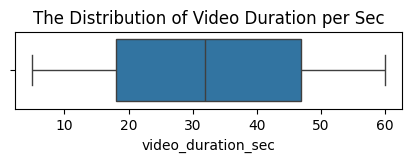

In [20]:
plt.figure(figsize=(5,1))
plt.title('The Distribution of Video Duration per Sec')
sns.boxplot(x='video_duration_sec', data =df)

<Axes: title={'center': 'The Histogram Distribution of Video Duration/ Second'}, xlabel='video_duration_sec', ylabel='Count'>

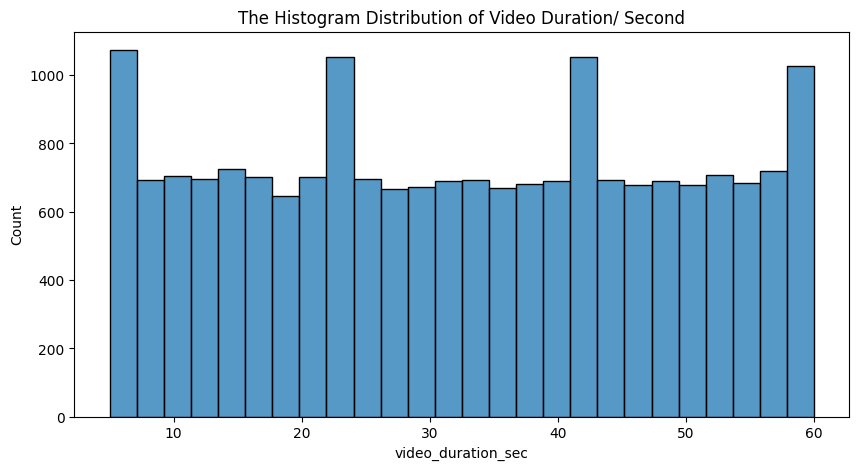

In [21]:
# A histogram of the values in the video_duration_sec column:
plt.figure(figsize=(10,5))
plt.title('The Histogram Distribution of Video Duration/ Second')
sns.histplot(x='video_duration_sec', data=df)

# The videos length ranges from 5 to 60 seconds and they are uniform

<Axes: title={'center': 'The Boxplot Distribution of Video View Counts'}, xlabel='video_view_count'>

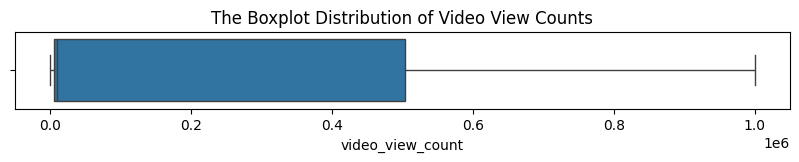

In [22]:
# A box plot  of the values in the video_view_count column to further explore the distribution of this variable.
plt.figure(figsize=(10,1))
plt.title('The Boxplot Distribution of Video View Counts')
sns.boxplot(x='video_view_count',data=df)

<Axes: title={'center': 'Histogram Distribution of Video View Counts'}, xlabel='video_view_count', ylabel='Count'>

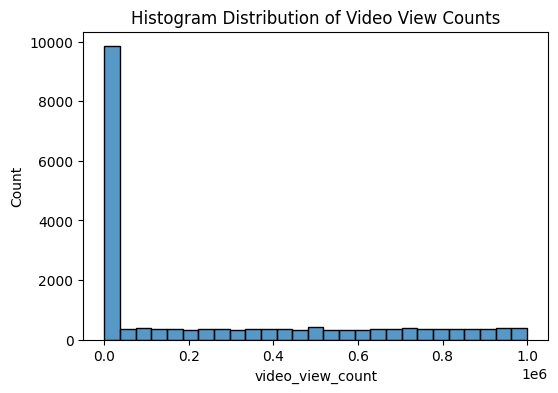

In [23]:
# a histogram of the values in the video_view_count column
plt.figure(figsize=(6,4))
plt.title('Histogram Distribution of Video View Counts')
sns.histplot(x='video_view_count',data=df)

# There is an uneven distribution where more than half the videos receiving fewer than 100,000 views.

<Axes: title={'center': 'Boxplot of Video Like Counts'}, xlabel='video_like_count'>

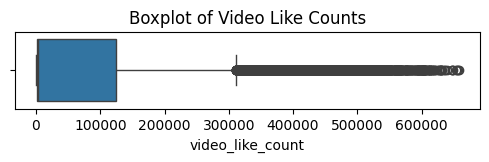

In [24]:
# A box plot to examine the spread of values in the video_like_count column.
plt.figure(figsize = (6,1))
plt.title('Boxplot of Video Like Counts')
sns.boxplot(x='video_like_count', data=df)

<Axes: title={'center': 'Histogram of Video Like Counts'}, xlabel='video_like_count', ylabel='Count'>

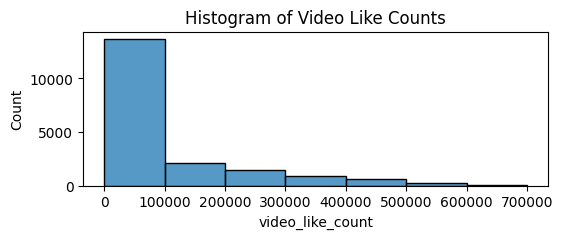

In [25]:
# Create a histogram of the values in the video_like_count
plt.figure(figsize=(6,2))
plt.title('Histogram of Video Like Counts')
sns.histplot(x='video_like_count', data=df, bins=range(0,7*10**5+1,10**5))

# Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. 
# However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.

<Axes: title={'center': 'Boxplot of Video Comment Counts'}, xlabel='video_comment_count'>

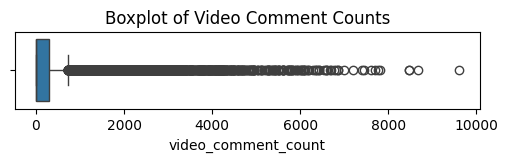

In [26]:
# a box plot to examine the spread of values in the video_comment_count
plt.figure(figsize = (6,1))
plt.title('Boxplot of Video Comment Counts')
sns.boxplot(x='video_comment_count', data=df)

<Axes: title={'center': 'Histogram of Video Comment Counts'}, xlabel='video_comment_count', ylabel='Count'>

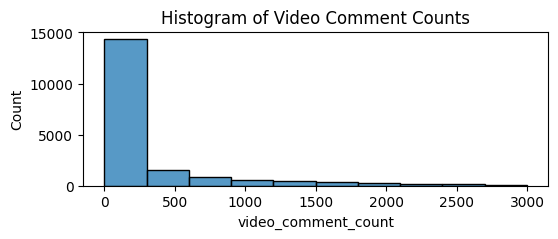

In [27]:
# Create a histogram of the values in the video_comment_count
plt.figure(figsize=(6,2))
plt.title('Histogram of Video Comment Counts')
sns.histplot(x='video_comment_count', data=df, bins=range(0,3001,300))

#Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. 
#Most videos have fewer than 100 comments. The distribution is very right-skewed.

<Axes: title={'center': 'Boxplot of Video Share Counts'}, xlabel='video_share_count'>

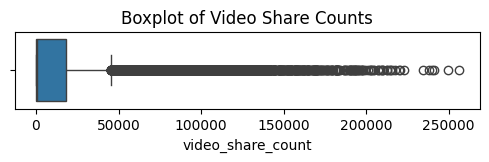

In [28]:
# a box plot to examine the spread of values in the video_share_count column.
plt.figure(figsize = (6,1))
plt.title('Boxplot of Video Share Counts')
sns.boxplot(x='video_share_count', data=df)

<Axes: title={'center': 'Histogram of Video Share Counts'}, xlabel='video_share_count', ylabel='Count'>

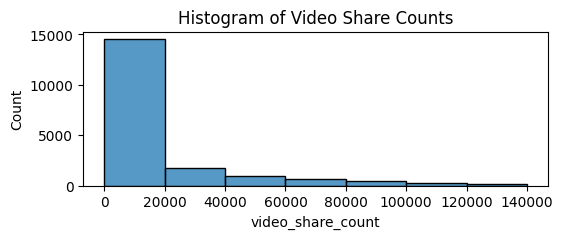

In [29]:
# a histogram of the values in the video_share_count column
plt.figure(figsize=(6,2))
plt.title('Histogram of Video Share Counts')
sns.histplot(x='video_share_count', data=df, bins=range(0,15*10**4+1,2*10**4))

# The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

<Axes: title={'center': 'Boxplot of Video Download Counts'}, xlabel='video_download_count'>

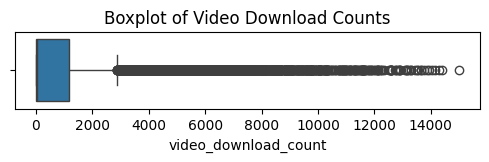

In [30]:
# a box plot to examine the spread of values in the video_download_count
plt.figure(figsize = (6,1))
plt.title('Boxplot of Video Download Counts')
sns.boxplot(x='video_download_count', data=df)

<Axes: title={'center': 'Histogram of Video Share Counts'}, xlabel='video_download_count', ylabel='Count'>

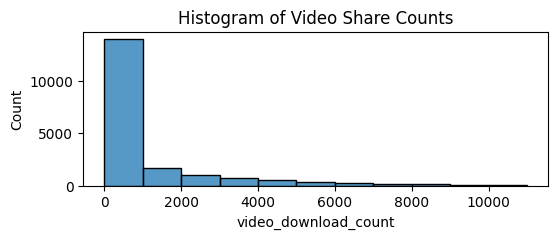

In [31]:
# a histogram of the values in the video_download_count
plt.figure(figsize=(6,2))
plt.title('Histogram of Video Share Counts')
sns.histplot(x='video_download_count', data=df, bins=range(0,12000,1000))

# majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

Text(0.5, 1.0, 'Claims by verification status histogram')

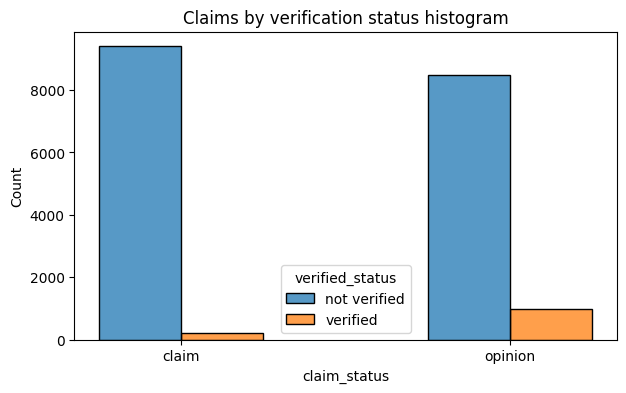

In [32]:
# a histogram with four bars: one for each combination of claim status and verification status
plt.figure(figsize=(7,4))
sns.histplot(x='claim_status',hue='verified_status',multiple = 'dodge',shrink=0.5,data=df)
plt.title('Claims by verification status histogram')

# there are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.

Text(0.5, 1.0, 'Histogram')

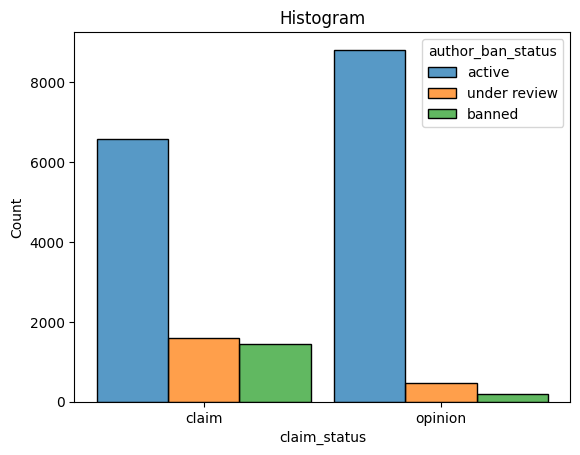

In [33]:
#  We examined the count of each claim_status for each author_ban_status. Now, a histogram to communicate the same information.
sns.histplot(data=df,x='claim_status',hue='author_ban_status',hue_order=['active','under review','banned'],multiple='dodge',shrink=0.9)
plt.title('Histogram')

C:\Users\User\AppData\Local\Temp\ipykernel_20032\2804554389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='author_ban_status',


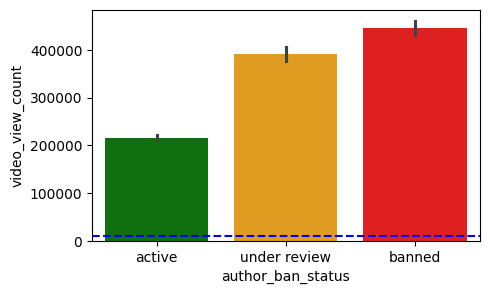

In [34]:
# Median view counts by ban status
# a bar plot with three bars: one for each author ban status.
medianview = df['video_view_count'].median()
plt.figure(figsize=(5, 3))
sns.barplot(x='author_ban_status',
            y='video_view_count',
            data=df,
            order=['active', 'under review', 'banned'],
            palette={'active': 'green', 'under review': 'orange', 'banned': 'red'})
plt.axhline(medianview, color='blue', linestyle='--', label='Median View Count')

# The median view counts for non-active authors are many times greater than the median view count for active authors. 
# Since you know that non-active authors are more likely to post claims, and that videos by non-active authors get 
# far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.

Text(0.5, 1.0, 'Total views by video claim status')

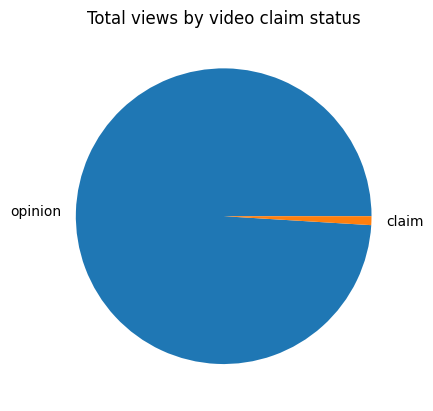

In [35]:
# a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.
pie_group = df.groupby('claim_status')['video_view_count'].sum()
plt.pie(pie_group, labels=['opinion','claim'])
plt.title('Total views by video claim status')

In [36]:
# Determining the Outliers
# Note: When building predictive models, the presence of outliers can be problematic. 
# For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. 
# Also, some outliers might indicate problems with how data was captured or recorded

count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr
    outlier_count = (df[column] > outlier_threshold).sum()   # Count the number of values that exceed the outlier threshold
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


<Axes: xlabel='video_view_count', ylabel='video_like_count'>

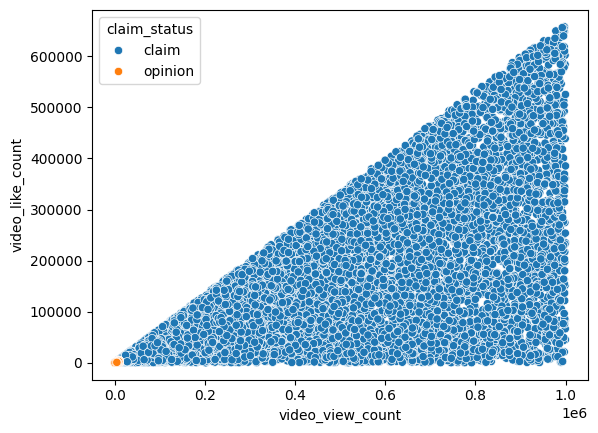

In [37]:
# The Scatter Plots:
sns.scatterplot(x="video_view_count", y="video_like_count",
                hue="claim_status", data=df)

<Axes: xlabel='video_view_count', ylabel='video_like_count'>

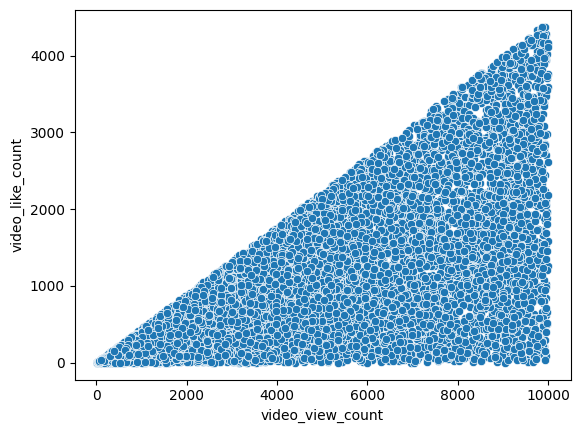

In [38]:
# Now for Opinion, a scatterplot
opinion = df[df['claim_status']=='opinion']
sns.scatterplot(x="video_view_count", y="video_like_count",data=opinion)

In [39]:
df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [40]:
import scipy
from scipy import stats

In [41]:
# Displaying first 5 rows
# Showing Descriptive Statistics
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [42]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146,0.276093,0.000954,0.054860
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865,0.173006,0.001326,0.050597
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000,0.130240,0.000098,0.014445
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000,0.264037,0.000455,0.039739
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000,0.398482,0.001268,0.081864
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000,0.666648,0.010280,0.265956


In [43]:
# Missing Values Checkup
missingval = df.isnull()

for col in missingval.columns.tolist():
    print(col)
    print(missingval[col].value_counts())
    print('')
# or df.isna().sum()

#
#
False    19382
Name: count, dtype: int64

claim_status
claim_status
False    19084
True       298
Name: count, dtype: int64

video_id
video_id
False    19382
Name: count, dtype: int64

video_duration_sec
video_duration_sec
False    19382
Name: count, dtype: int64

video_transcription_text
video_transcription_text
False    19084
True       298
Name: count, dtype: int64

verified_status
verified_status
False    19382
Name: count, dtype: int64

author_ban_status
author_ban_status
False    19382
Name: count, dtype: int64

video_view_count
video_view_count
False    19084
True       298
Name: count, dtype: int64

video_like_count
video_like_count
False    19084
True       298
Name: count, dtype: int64

video_share_count
video_share_count
False    19084
True       298
Name: count, dtype: int64

video_download_count
video_download_count
False    19084
True       298
Name: count, dtype: int64

video_comment_count
video_comment_count
False    19084
True       298
Name: count, dtype: int64

l

In [44]:
# Drop the miss values
df.dropna(axis=0,inplace=True)

In [45]:
# Display the Rows
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [46]:
print(df['verified_status'].value_counts())
print(df['video_view_count'].value_counts())

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64
video_view_count
2562.0      7
7393.0      7
4081.0      6
2030.0      6
3184.0      6
           ..
279786.0    1
170578.0    1
755479.0    1
400853.0    1
3394.0      1
Name: count, Length: 15632, dtype: int64


In [47]:
# the relationship between verified_status and video_view_count. 
# One approach is to examine the mean value of video_view_count for each group of verified_status in the sample data.
notveri = df[df['verified_status'] == 'not verified']
mean_not = notveri['video_view_count'].mean()

veri = df[df['verified_status'] == 'verified']
mean_veri = veri['video_view_count'].mean()

print('Average of Not verified for Video View Count:', mean_veri)
print('Average of verified for Video View Count:', mean_not)

# OR df.groupby('verified_status')['video_view_count'].mean()

Average of Not verified for Video View Count: 91439.16416666667
Average of verified for Video View Count: 265663.78533885034


In [48]:
# The Hypotheses for ths project for conducting Null and Alternative Hypotheses: (Significance Level 5%)
'''
H0--> Null hypothesis: There is no difference in number of views between TikTok videos posted by verified accounts and 
by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

HA--> Alternative hypothesis: There is a difference in number of views between TikTok videos posted by verified accounts and
by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).
'''

'\nH0--> Null hypothesis: There is no difference in number of views between TikTok videos posted by verified accounts and \nby unverified accounts (any observed difference in the sample data is due to chance or sampling variability).\n\nHA--> Alternative hypothesis: There is a difference in number of views between TikTok videos posted by verified accounts and\nby unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).\n'

In [49]:
# Conducting a 2-sample T-test
not_verified = df[df['verified_status'] == 'not verified']['video_view_count']
verified = df[df['verified_status'] == 'verified']['video_view_count']

In [50]:
# The T-test:
stats.ttest_ind(a=not_verified,b=verified,equal_var=False)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

In [51]:
'''
P-value is amller than the significance value = 5%, so we reject the Null Hypothesis, and this means there IS a
statiscally significant difference in the mean video view count between verified and unverified accounts on TikTok.
'''

'\nP-value is amller than the significance value = 5%, so we reject the Null Hypothesis, and this means there IS a\nstatiscally significant difference in the mean video view count between verified and unverified accounts on TikTok.\n'

In [52]:
'''
The analysis shows that there is a statistically significant difference in the average view counts between videos from verified 
accounts and videos from unverified accounts. This suggests there might be fundamental behavioral differences between these two groups of accounts.

It would be interesting to investigate the root cause of this behavioral difference. 
For example, do unverified accounts tend to post more clickbait-y videos? 
Or are unverified accounts associated with spam bots that help inflate view counts?

The next step will be to build a regression model on verified_status. 
A regression model is the natural next step because the end goal is to make predictions on claim status. 
A regression model for verified_status can help analyze user behavior in this group of verified users. 
Technical note to prepare regression model: because the data is skewed, and there is a significant difference in account types, 
it will be key to build a logistic regression model.
'''

'\nThe analysis shows that there is a statistically significant difference in the average view counts between videos from verified \naccounts and videos from unverified accounts. This suggests there might be fundamental behavioral differences between these two groups of accounts.\n\nIt would be interesting to investigate the root cause of this behavioral difference. \nFor example, do unverified accounts tend to post more clickbait-y videos? \nOr are unverified accounts associated with spam bots that help inflate view counts?\n\nThe next step will be to build a regression model on verified_status. \nA regression model is the natural next step because the end goal is to make predictions on claim status. \nA regression model for verified_status can help analyze user behavior in this group of verified users. \nTechnical note to prepare regression model: because the data is skewed, and there is a significant difference in account types, \nit will be key to build a logistic regression model.

In [53]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

In [54]:
# Recheck Data:
'''
df.head()
df.shape
df.dtypes
df.info()
df.describe()
'''

'\ndf.head()\ndf.shape\ndf.dtypes\ndf.info()\ndf.describe()\n'

In [55]:
# Check Miss Values:
# df.isna().sum()
# df.dropna(axis=0, inplace=True)

In [56]:
# For Duplicates:
df.duplicated().sum()

0

<Axes: title={'center': 'Video Duration Seconds Boxplot'}, xlabel='video_duration_sec'>

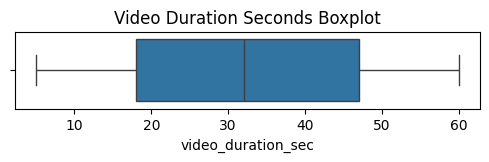

In [57]:
# a boxplot to visualize distribution of `video_duration_sec` (HANDLING OULIERS)
plt.figure(figsize=(6,1))
plt.title('Video Duration Seconds Boxplot')
sns.boxplot(x='video_duration_sec',data=df)

<Axes: title={'center': 'Video Like Count Boxplot'}, xlabel='video_like_count'>

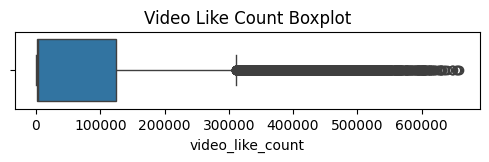

In [58]:
# Now for video_comment_count
plt.figure(figsize=(6,1))
plt.title('Video Like Count Boxplot')
sns.boxplot(x=df['video_like_count'])

<Axes: title={'center': 'Video Comment Count Boxplot'}, xlabel='video_comment_count'>

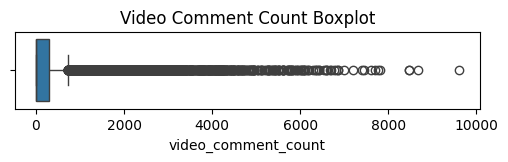

In [59]:
# Now for video_comment_count
plt.figure(figsize=(6,1))
plt.title('Video Comment Count Boxplot')
sns.boxplot(x=df['video_comment_count'])

In [60]:
# Check for and handle outliers
percentile25 = df["video_like_count"].quantile(0.25)
percentile75 = df["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

df.loc[df["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [61]:
# Another one(Video Comment count) Since both have outliers:
percentile25 = df['video_comment_count'].quantile(0.25)
percentile75 = df['video_comment_count'].quantile(0.75)
iqr = percentile75 - percentile25
uplimit = percentile75 + 1.5 * iqr
df.loc[df['video_comment_count'] > uplimit, 'video_comment_count'] = uplimit

In [62]:
# Now CLASS BALANCE
df['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

In [63]:
'''
Outcome Variable NOT very balanced:
Not verified: 93.7%
Verified: 6.3%
'''

'\nOutcome Variable NOT very balanced:\nNot verified: 93.7%\nVerified: 6.3%\n'

In [64]:
# Use resampling to create class balance in the outcome variable, if needed
data_majority = df[df["verified_status"] == "not verified"]
data_minority = df[df["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority),random_state=0)

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

In [65]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


In [66]:
# Extract the length of each video_transcription_text and add this as a column to the dataframe, 
# so that it can be used as a potential feature in the model.
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

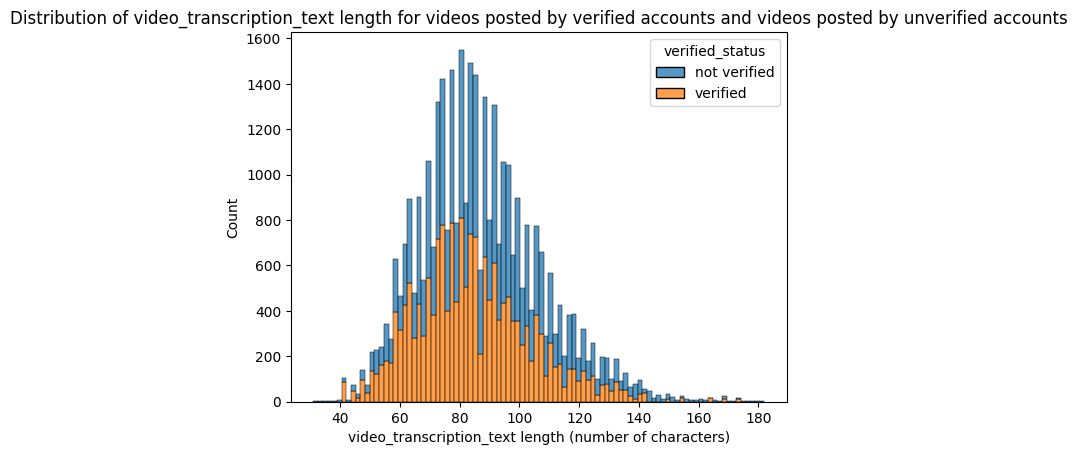

In [67]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data=data_upsampled, multiple="stack", x="text_length", hue="verified_status", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

In [68]:
# Now check correlation
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.282755,-0.311144,-0.214349,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.005539,0.005954,-0.001698,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.003731,-0.021063,0.001244,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.278638,0.292290,0.204884,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.565200,0.442375,0.404021,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.485643,0.389892,0.594859,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.476817,0.600509,0.343180,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.455890,0.634753,0.332204,0.217661
likes_per_view,-0.282755,-0.005539,-0.003731,0.278638,0.565200,0.485643,0.476817,0.455890,1.000000,0.539845,0.675187,0.094428
comments_per_view,-0.311144,0.005954,-0.021063,0.292290,0.442375,0.389892,0.600509,0.634753,0.539845,1.000000,0.394044,0.114497


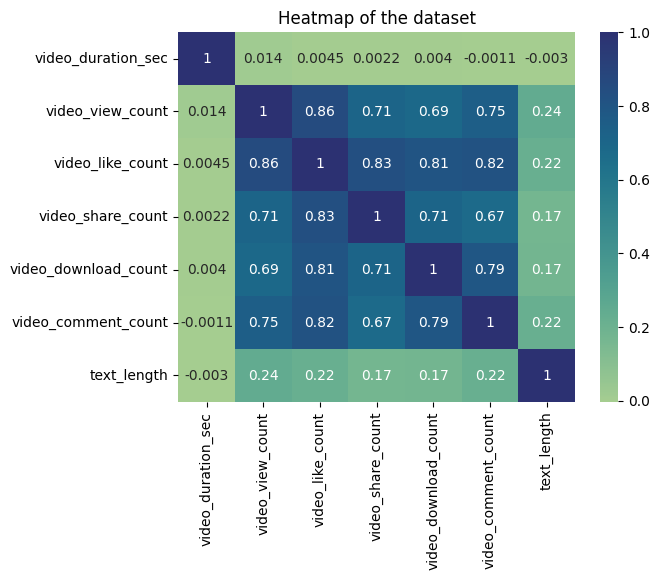

In [69]:
# Check its HeatMap
sns.heatmap(data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True), annot=True, cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

In [70]:
'''
The above heatmap shows that the following pair of variables are strongly correlated: video_view_count and video_like_count 
(0.86 correlation coefficient). One of the model assumptions for logistic regression is no severe multicollinearity among the features. 
'''

'\nThe above heatmap shows that the following pair of variables are strongly correlated: video_view_count and video_like_count \n(0.86 correlation coefficient). One of the model assumptions for logistic regression is no severe multicollinearity among the features. \n'

In [71]:
# CHoose The Variables Now
# '#' , 'video_id', are not used since they are not useful info for the claim and opinion model, especially video_like_count because there is a strong
# multicollinearity and regression models won't create a perfect estimated for that.
Y = data_upsampled[['verified_status']]
X = X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", 
                        "video_download_count", "video_comment_count"]]

In [72]:
#  Train and testing now
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25,random_state=0)
print('xtrain samples:', xtrain.shape)
print('xtest samples:', xtest.shape)
print('ytrain samples:', ytrain.shape)
print('ytest samples:', ytest.shape)

xtrain samples: (26826, 7)
xtest samples: (8942, 7)
ytrain samples: (26826, 1)
ytest samples: (8942, 1)


In [73]:
# 7 and 1 are training and testing sets, 26826 and 8942 are outcome variable for training and testing and align features above
# of 7 and 1
xtrain.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [74]:
xtrain['claim_status'].unique()

array(['opinion', 'claim'], dtype=object)

In [75]:
xtrain['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [76]:
# Since both are categorial, we need them numeric, so use hot encoding to work with implementation models:
xtrainencode = xtrain[['claim_status','author_ban_status']]
xtrainencode.head(2)

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active


In [77]:
xencode = OneHotEncoder(drop='first', sparse_output=False)

In [78]:
rowz = xencode.fit_transform(xtrainencode)
xencode.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [79]:
rowz

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [80]:
dfcode = pd.DataFrame(data=rowz,columns=xencode.get_feature_names_out())
dfcode.head(2)

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0


In [81]:
# Now we combine the training datasets of both dfcode and xtrain, but we must dorp the categorial variables first:
xtrain.drop(columns=['claim_status', 'author_ban_status']).head(3)

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0


In [82]:
xtrainfinal = pd.concat([xtrain.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True), dfcode], axis=1)
xtrainfinal.head(2)

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0


In [83]:
# Now for Y:
ytrain.dtypes

verified_status    object
dtype: object

In [84]:
ytrain['verified_status'].unique()

array(['verified', 'not verified'], dtype=object)

In [85]:
# So use OneHotEncoder for this:
yencode = OneHotEncoder(drop='first',sparse_output=False)

In [86]:
ytrainfinal = yencode.fit_transform(ytrain.values.reshape(-1,1)).ravel()
ytrainfinal

array([1., 1., 1., ..., 1., 1., 0.])

In [87]:
# NOW WE "CONSTRUCT" THE MODEL:

In [88]:
xtestcode = xtest[['claim_status','author_ban_status']]
xtestcode.head(2)

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active


In [89]:
rowzi = xencode.fit_transform(xtestcode)
rowzi

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [90]:
xtestdf = pd.DataFrame(data=rowzi, columns = xencode.get_feature_names_out())
xtestdf.head(2)

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0


In [91]:
# Like before that we need numeric, remove categories from xtest:
xtest.drop(columns=['claim_status','author_ban_status']).head(2)

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0


In [92]:
xtestfinal = pd.concat([xtest.drop(columns=['claim_status','author_ban_status']).reset_index(drop=True), xtestdf], axis=1)
xtestfinal.head(2)

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0


In [93]:
# Test the logistic regression model
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(xtrainfinal, ytrainfinal)
yhat = log_clf.predict(xtestfinal)
yhat

array([1., 1., 0., ..., 1., 0., 1.])

In [94]:
ytest

,verified_status
21061,verified
31748,verified
20197,verified
5727,not verified
11607,not verified
...,...
14756,not verified
26564,verified
14800,not verified
35705,verified


In [95]:
# Adjust Ytest:
ytestfinal = yencode.fit_transform(ytest.values.reshape(-1,1)).ravel()
ytestfinal

array([1., 1., 1., ..., 0., 1., 1.])

In [96]:
xtrainfinal.shape, ytrainfinal.shape, xtestfinal.shape, ytestfinal.shape

((26826, 8), (26826,), (8942, 8), (8942,))

In [97]:
'''
The number of features (8) aligns between the training and testing sets.
The number of rows aligns between the features and the outcome variable for training (26826) and testing (8942).
'''

'\nThe number of features (8) aligns between the training and testing sets.\nThe number of rows aligns between the features and the outcome variable for training (26826) and testing (8942).\n'

In [98]:
# VISUALIZINF THE MATRIX:

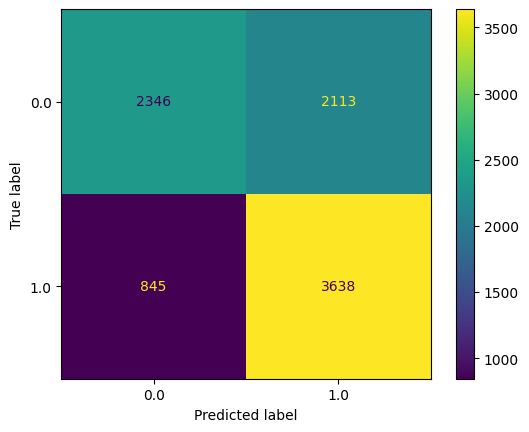

In [99]:
logcm = confusion_matrix(ytestfinal,yhat,labels=log_clf.classes_)
logdisp = ConfusionMatrixDisplay(confusion_matrix=logcm, display_labels=log_clf.classes_)
logdisp.plot()

In [100]:
#EQUATIONS:
(3638+2346)/(2346+2113+845+3638)

0.6692015209125475

In [101]:
'''
1: The 1st quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

2: The 2nd quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by 
verified accounts.

3: The 3rd quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted 
by unverified accounts.

4: The 4th quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.
'''

'\n1: The 1st quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.\n\n2: The 2nd quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by \nverified accounts.\n\n3: The 3rd quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted \nby unverified accounts.\n\n4: The 4th quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.\n\nA perfect model would yield all true negatives and true positives, and no false negatives or false positives.\n'

In [102]:
# Classification Report:
labelz = ['verified','not verified']
print(classification_report(ytestfinal,yhat,target_names=labelz))

              precision    recall  f1-score   support

    verified       0.74      0.53      0.61      4459
not verified       0.63      0.81      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.68      0.67      0.66      8942
weighted avg       0.68      0.67      0.66      8942



In [103]:
'''
The classification report above shows that the logistic regression model achieved a precision of 61% and a recall of 84%, 
and it achieved an accuracy of 65%. 
Note that the precision and recall scores are taken from the "not verified" row of the output because 
that is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, 
and the weighted average represents the combined metrics for both classes of the target variable.
'''

'\nThe classification report above shows that the logistic regression model achieved a precision of 61% and a recall of 84%, \nand it achieved an accuracy of 65%. \nNote that the precision and recall scores are taken from the "not verified" row of the output because \nthat is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, \nand the weighted average represents the combined metrics for both classes of the target variable.\n'

In [104]:
# Get the Model Coefficients:
pd.DataFrame(data={'Feature Name':log_clf.feature_names_in_, 'Model Coefficient':log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,-3.308494e-03
1,video_view_count,-3.478850e-07
2,video_share_count,4.979665e-06
3,video_download_count,-7.223523e-05
4,video_comment_count,3.325829e-04
5,claim_status_opinion,1.515372e+00
6,author_ban_status_banned,-5.726036e-01
7,author_ban_status_under review,-4.232512e-01


In [105]:
'''
The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. 
We decided to drop video_like_count from the model building.

Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user 
having a verified status.

The logistic regression model had not great, but acceptable predictive power: a precision of 61% is less than ideal, but a recall of 
84% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable.
We developed a logistic regression model for verified status based on video features. 
The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, 
longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated 
coefficients in the model, so their association with verified status seems to be small.
'''

'\nThe dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. \nWe decided to drop video_like_count from the model building.\n\nBased on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user \nhaving a verified status.\n\nThe logistic regression model had not great, but acceptable predictive power: a precision of 61% is less than ideal, but a recall of \n84% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable.\nWe developed a logistic regression model for verified status based on video features. \nThe model had decent predictive power. Based on the estimated model coefficients from the logistic regression, \nlonger videos tend to be associated with higher odds of the user being verified. Other video features have small estimated \ncoefficients in the model, so their association wi

In [106]:
# The MODELING PART NOW: FINAL PART

In [107]:
'''
1. What are you being asked to do?
    Business need and modeling objective

TikTok users can report videos that they believe violate the platform's terms of service. 
Because there are millions of TikTok videos created and viewed every day, this means that many videos get reported—too many to be individually 
reviewed by a human moderator. Analysis indicates that when authors do violate the terms of service, they're much more likely to be
TikTok wants to build a machine learning model to help identify claims and opinions. 
Videos that are labeled opinions will be less likely to go on to be reviewed by a human moderator. 
Videos that are labeled as claims will be further sorted by a downstream process to determine whether they should get prioritized for review. 
For example, perhaps videos that are classified as claims would then be ranked by how many times they were reported, then the top x% would be 
reviewed by a human each day. A machine learning model would greatly assist in the effort to present human moderators with videos that are most 
likely to be in violation of TikTok's terms of service.

    Modeling design and target variable:

The data dictionary shows that there is a column called claim_status. 
This is a binary value that indicates whether a video is a claim or an opinion. This will be the target variable. 
In other words, for each video, the model should predict whether the video is a claim or an opinion.
This is a classification task because the model is predicting a binary class.

    Select an evaluation metric:

To determine which evaluation metric might be best, consider how the model might be wrong. There are two possibilities for bad predictions:
False positives: When the model predicts a video is a claim when in fact it is an opinion
False negatives: When the model predicts a video is an opinion when in fact it is a claim

2. What are the ethical implications of building the model? 
In the given scenario, it's better for the model to predict false positives when it makes a mistake, and worse for it to predict false negatives. 
It's very important to identify videos that break the terms of service, even if that means some opinion videos are misclassified as claims. 
The worst case for an opinion misclassified as a claim is that the video goes to human review. 
The worst case for a claim that's misclassified as an opinion is that the video does not get reviewed and it violates the terms of service. 
A video that violates the terms of service would be considered posted from a "banned" author, as referenced in the data dictionary.
Because it's more important to minimize false negatives, the model evaluation metric will be recall.

3. How would you proceed?

    Modeling workflow and model selection process:

Previous work with this data has revealed that there are ~20,000 videos in the sample. 
This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:

Split the data into train/validation/test sets (60/20/20)
Fit models and tune hyperparameters on the training set
Perform final model selection on the validation set
Assess the champion model's performance on the test set
'''

'\n1. What are you being asked to do?\n    Business need and modeling objective\n\nTikTok users can report videos that they believe violate the platform\'s terms of service. \nBecause there are millions of TikTok videos created and viewed every day, this means that many videos get reported—too many to be individually \nreviewed by a human moderator. Analysis indicates that when authors do violate the terms of service, they\'re much more likely to be\nTikTok wants to build a machine learning model to help identify claims and opinions. \nVideos that are labeled opinions will be less likely to go on to be reviewed by a human moderator. \nVideos that are labeled as claims will be further sorted by a downstream process to determine whether they should get prioritized for review. \nFor example, perhaps videos that are classified as claims would then be ranked by how many times they were reported, then the top x% would be \nreviewed by a human each day. A machine learning model would greatly 

In [108]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

In [109]:
# df.shape
# df.info()
# df.describe()

# df.isna().sum()
# df = df.dropna(axis=0)

# df.duplicated().sum()
'''
Check for and handle outliers
Exemplar response: Tree-based models are robust to outliers, so there is no need to impute or drop any values based on where they fall in their 
distribution.
'''

'\nCheck for and handle outliers\nExemplar response: Tree-based models are robust to outliers, so there is no need to impute or drop any values based on where they fall in their \ndistribution.\n'

In [110]:
# Class Balance:
df['claim_status'].value_counts(normalize=True)
# It's balanced: 50% claims, 49.65% opinions

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

In [111]:
# Extract length of video_transcription_text:
df['text length'] = df['video_transcription_text'].str.len()
df.head(1)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.0,0.000702,97


In [112]:
# Average Text Lenght for Opinions and Claims:
df[['claim_status','text length']].groupby('claim_status').mean()

,text length
claim_status,
claim,95.376978
opinion,82.722562


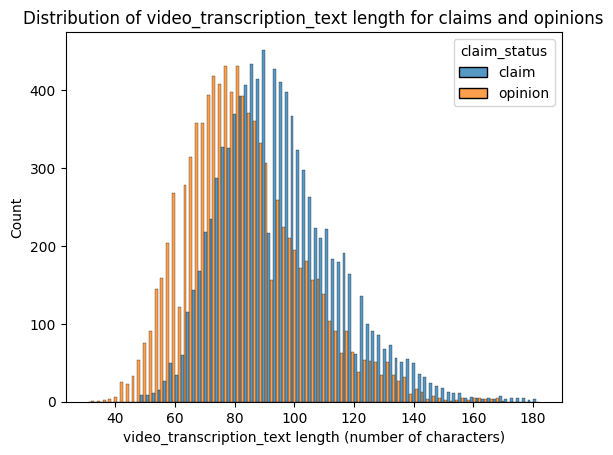

In [113]:
# Distribution of text length:
sns.histplot(data=df, multiple="dodge", x="text length", hue="claim_status", legend=True) # we add 'multipe dodge' since its 2 plots 
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

In [114]:
'''
Letter count distributions for both claims and opinions are approximately normal with a slight right skew. Claim videos tend to have more characters
'''

'\nLetter count distributions for both claims and opinions are approximately normal with a slight right skew. Claim videos tend to have more characters\n'

In [151]:
# Features Selection:
import warnings
warnings.filterwarnings('ignore')
X = df.copy()
X = X.drop(['#', 'video_id'], axis=1)
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1}).infer_objects(copy=False)
X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'], drop_first=True)
X.head(3)

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137,False,False,False


In [152]:
# Split data for 'claim_status'
y = X['claim_status']

In [153]:
X = X.drop(['claim_status'], axis=1)

In [154]:
# Train and Test variables:(80/20)
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split train and val now: (75/25) with ratio NOW (60/20/20):
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

In [119]:
#DImensions: for EACH

NEW X Train Shape: (11450, 14)
NEW Y Train Shape: (11450,)
X Validation Shape: (3817, 14)
Y Validation Shape: (3817,)
Y Validation Shape: (3817,)
X Test Shape: (3817, 14)
Y Test Shape: (3817,)


In [120]:
# TOKENIZE TEXT COLUMN:
'''
The feature video_transcription_text is text-based. It is not a categorical variable, since it does not have a fixed number of possible values. 
One way to extract numerical features from it is through a bag-of-words algorithm like CountVectorizer.
CountVectorizer works by splitting text into n-grams, which are groups of n consecutive words
'''

'\nThe feature video_transcription_text is text-based. It is not a categorical variable, since it does not have a fixed number of possible values. \nOne way to extract numerical features from it is through a bag-of-words algorithm like CountVectorizer.\nCountVectorizer works by splitting text into n-grams, which are groups of n consecutive words\n'

In [156]:
count_vec = CountVectorizer(ngram_range = (2,3), max_features = 15, stop_words = 'english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [157]:
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [158]:
# In DataFrame:
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

In [159]:
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

In [125]:
# VALIDATION:

In [160]:
# Now Val:
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
countvaldf

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [161]:
# In DataTaygura:
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())

In [162]:
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

In [129]:
# FOR TEST (SAME THING):

In [163]:
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)

In [166]:
# Build a random forest model: Fit a random forest model to the training set. 
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy':'accuracy', 'precision':'precision', 'recall':'recall', 'f1':'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [167]:
%%time
rf_cv.fit(X_train_final, y_train)

CPU times: total: 7min 59s
Wall time: 10min 15s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [168]:
rf_cv.best_score_

0.9958582006702817

In [169]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [135]:
'''
This model performs exceptionally well, with an average recall score of 0.995 across the five cross-validation folds. 
After checking the precision score to be sure the model is not classifying all samples as claims, it is clear that 
this model is making almost perfect classifications.
'''

'\nThis model performs exceptionally well, with an average recall score of 0.995 across the five cross-validation folds. \nAfter checking the precision score to be sure the model is not classifying all samples as claims, it is clear that \nthis model is making almost perfect classifications.\n'

In [171]:
# Build XGBOOST MODEL:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [172]:
%%time
xgb_cv.fit(X_train_final, y_train)

CPU times: total: 12min 35s
Wall time: 2min 23s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [174]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 300}

In [1]:
# EVALUATING MODELS:

In [175]:
y_pred = rf_cv.best_estimator_.predict(X_val_final)

In [176]:
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [177]:
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

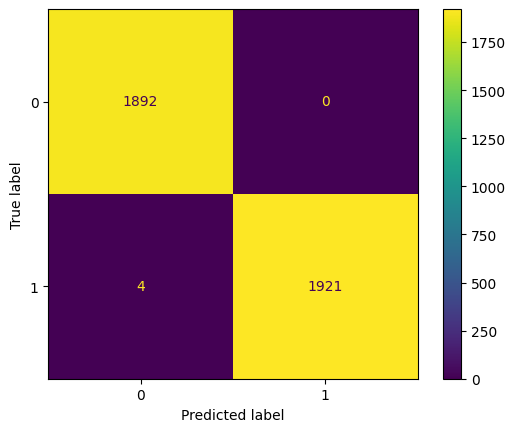

In [178]:
# Create a confusion matrix to visualize the results of the classification model
log_cm = confusion_matrix(y_val, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)
log_disp.plot()
plt.show()

In [ ]:
'''
The upper-left quadrant displays the number of true negatives: the number of opinions that the model accurately classified as so.
The upper-right quadrant displays the number of false positives: the number of opinions that the model misclassified as claims.
The lower-left quadrant displays the number of false negatives: the number of claims that the model misclassified as opinions.
The lower-right quadrant displays the number of true positives: the number of claims that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.
As the above confusion matrix shows, this model does not produce any false negatives.
'''

In [ ]:
# CREATING A CLASSIFICATION REPORT:

In [179]:
targetlabels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=targetlabels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



In [ ]:
'''
The classification report above shows that the random forest model scores were nearly perfect. 
The confusion matrix indicates that there were 10 misclassifications—five false postives and five false negatives.
'''

In [180]:
# Now for XGBOOST:
y_pred = xgb_cv.best_estimator_.predict(X_val_final)

In [181]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

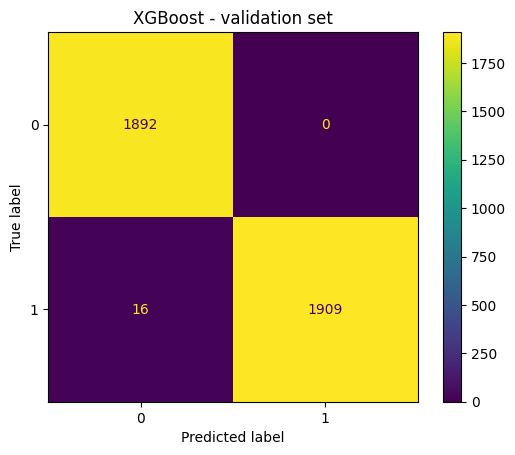

In [182]:
log_cm = confusion_matrix(y_val, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)
log_disp.plot()
plt.title('XGBoost - validation set');
plt.show()

In [ ]:
# CLASSIFICATION REPORT TIME:

In [183]:
targetlabels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=targetlabels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1892
       claim       1.00      0.99      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



In [ ]:
'''
The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives. 
Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. 
The random forest model has a better recall score, and is therefore the champion model.
'''

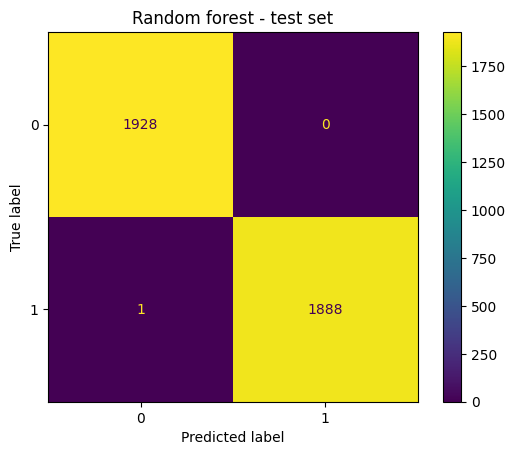

In [184]:
# Now for Champion Model using: 'TEST DATA' NOW
y_pred = rf_cv.best_estimator_.predict(X_test_final)

log_cm = confusion_matrix(y_test, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)
log_disp.plot()
plt.title('Random forest - test set');
plt.show()

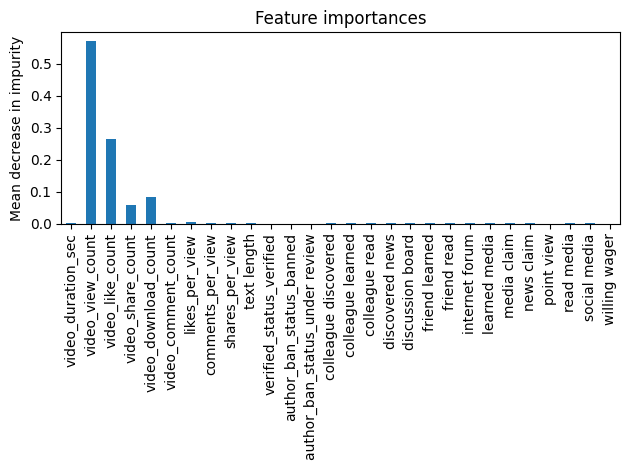

In [185]:
# Its Feature Importance:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [ ]:
'''
The most predictive features all were related to engagement levels generated by the video. 
This is not unexpected, as analysis from prior EDA pointed to this conclusion.

1. Would you recommend using this model? Why or why not? 
Yes, one can recommend this model because it performed well on both the validation and test holdout data. 
Furthermore, both precision and F1 scores were consistently high. The model very successfully classified claims and opinions.

2. What was your model doing? Can you explain how it was making predictions? 
The model's most predictive features were all related to the user engagement levels associated with each video. 
It was classifying videos based on how many views, likes, shares, and downloads they received.

3. Are there new features that you can engineer that might improve model performance? 
Because the model currently performs nearly perfectly, there is no need to engineer any new features.

4. What features would you want to have that would likely improve the performance of your model? 
The current version of the model does not need any new features. 
However, it would be helpful to have the number of times the video was reported. 
It would also be useful to have the total number of user reports for all videos posted by each author.
'''